### **Predicting Diabetes**

### Introduction 

Diabetes is a disease that affects millions of people worldwide, and can be caused by both genetic and/or environmental effects. People with this disease are unable to produce adequate amounts of insulin, a hormone that regulates blood sugar levels. Because of this sugar will build up in the bloodstream which causes a variety of health issues which can worsen over time, however with the correct treatment and lifestyle choices, patients can prevent complications and live long, happy lives (NIDDK). 

The dataset “Predict Diabetes” from the National Institute of Diabetes and Digestive and Kidney helps us predict if a patient has diabetes. This dataset the diagnostic measurements age (in years) , pregnancies (amount they have had), blood glucose levels (mg/dL), blood pressure, skin thickness, blood insulin level, BMI (kg/m2), and Diabetes pedigree function (probability of having diabetes based on family history) , are all recorded as well as the outcome (whether they have diabetes or not). The inclusion criteria of the participants is that they are all female and at least 21 years old. 

Though this dataset contains many diagnostic measurements as predictors, we decided to base our data analysis on 3 predictors: Diabetes Pedigree Function, BMI, and glucose levels. Our analysis will answer the question of “Can we predict a patient has diabetes based on their family's history with diabetes (measured as the Diabetes Pedigree Function), BMI, and the level of glucose in their blood?” 

We acquired the data necessary to perform this analysis through https://www.kaggle.com/datasets/whenamancodes/predict-diabities. kaggle.com is a very helpful tool, it is a website with a large collection of databases for the public to use. Many of these datasets are also already tidy which is very convenient for users. Another perk is that most of the databases have been used and analyzed by many different people, so many variables can be compared without you having to do it all yourself.

### Preliminary exploratory data analysis

In [2]:
#install libraries
library(repr)
library(tidyverse)
library(tidymodels)

#load the dataset into R x
diabetes_data <- read_csv("data/diabetes.csv")
diabetes_data

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [3]:
#the dataset is already in a tidy data format

#extracting the columns that we want
diabetes_data <- diabetes_data|>
                 select(Glucose, BMI, DiabetesPedigreeFunction, Outcome)


#Since zeros are meaningless in the context, they are missing data. 
#count number of missing data in each column

missing_data <- diabetes_data|>
                 filter(Glucose == 0|BMI == 0)|>
                 nrow()

missing_data

#move out zeros(missing data)

final_data <- diabetes_data|>
                 filter(Glucose!= 0)
  

final_data <- final_data|>
                 filter(BMI!= 0)

final_data#here is final dataset

[1] 16

Glucose,BMI,DiabetesPedigreeFunction,Outcome
<dbl>,<dbl>,<dbl>,<dbl>
148,33.6,0.627,1
85,26.6,0.351,0
183,23.3,0.672,1
89,28.1,0.167,0
137,43.1,2.288,1
116,25.6,0.201,0
78,31.0,0.248,1
115,35.3,0.134,0
197,30.5,0.158,1


In [4]:
# Function to convert 0 and 1 to "No" and "Yes"
convert_to_yes_no <- function(x) {
  ifelse(x == 1, "Yes", "No")
}

#converting 0s and 1s to 'Yes' and 'No'
final_data  <- final_data |>
    mutate(Outcome = convert_to_yes_no(Outcome))    

final_data

Glucose,BMI,DiabetesPedigreeFunction,Outcome
<dbl>,<dbl>,<dbl>,<chr>
148,33.6,0.627,Yes
85,26.6,0.351,No
183,23.3,0.672,Yes
89,28.1,0.167,No
137,43.1,2.288,Yes
116,25.6,0.201,No
78,31.0,0.248,Yes
115,35.3,0.134,No
197,30.5,0.158,Yes


In [5]:
#split the data and get the training data
diabetes_split <- initial_split(final_data, prop = 0.75, strata = Outcome)
diabetes_train <- training(diabetes_split)

#count number of rows
num_of_obs <- diabetes_train |>
              nrow()

#mean of each predictor
mean_of_predictors <- diabetes_train|>
                      summarize(mean_Glucose = mean(Glucose),
                                mean_BMI = mean(BMI),
                                mean_DiabetesPedigreeFunction = mean(DiabetesPedigreeFunction))
                
diabetes_summarize_table1 <- mean_of_predictors|>
                   mutate(missing_data = missing_data, num_of_obs = num_of_obs)

diabetes_summarize_table1

diabetes_summarize_table2 <- diabetes_train|>
                             group_by(Outcome)|>
                             summarize(count = n())
diabetes_summarize_table2

mean_Glucose,mean_BMI,mean_DiabetesPedigreeFunction,missing_data,num_of_obs
<dbl>,<dbl>,<dbl>,<int>,<int>
120.6702,32.68174,0.4793493,16,564


Outcome,count
<chr>,<int>
No,366
Yes,198


In [6]:
#convert outcome to a factor type
diabetes_train <- diabetes_train|>
                  mutate(Outcome = as.factor(Outcome))
diabetes_train

Glucose,BMI,DiabetesPedigreeFunction,Outcome
<dbl>,<dbl>,<dbl>,<fct>
85,26.6,0.351,No
89,28.1,0.167,No
115,35.3,0.134,No
110,37.6,0.191,No
139,27.1,1.441,No
103,43.3,0.183,No
126,39.3,0.704,No
99,35.4,0.388,No
97,23.2,0.487,No


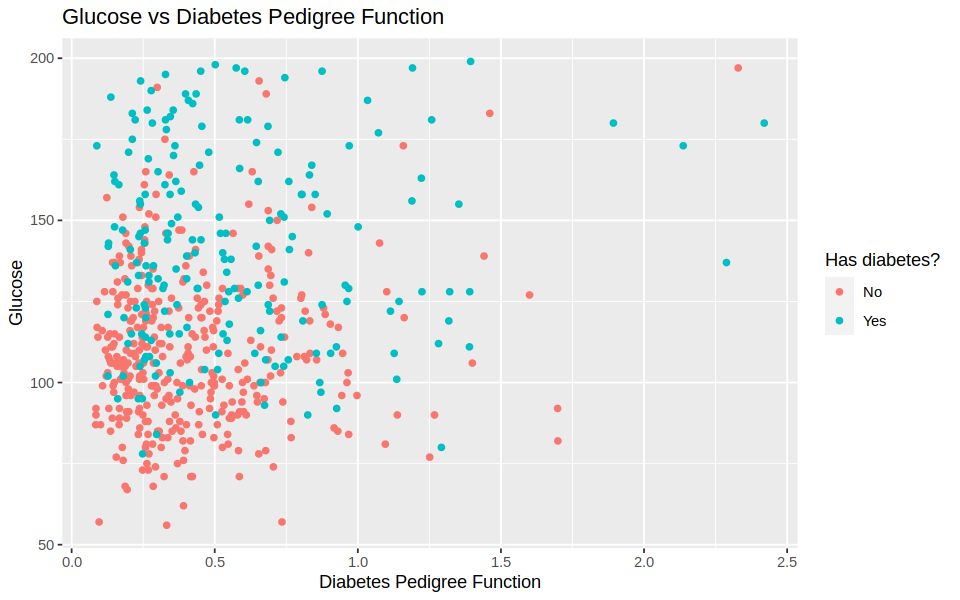

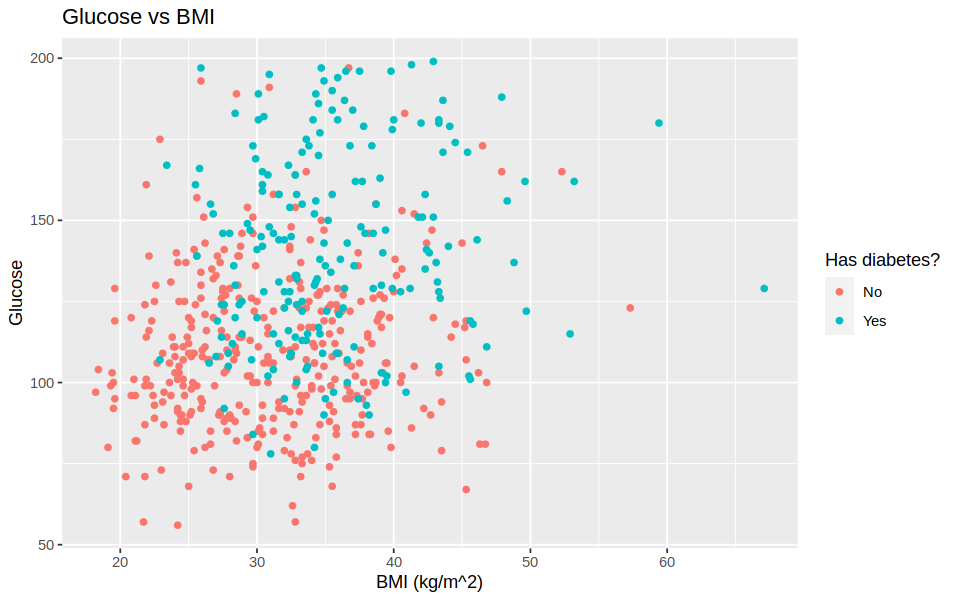

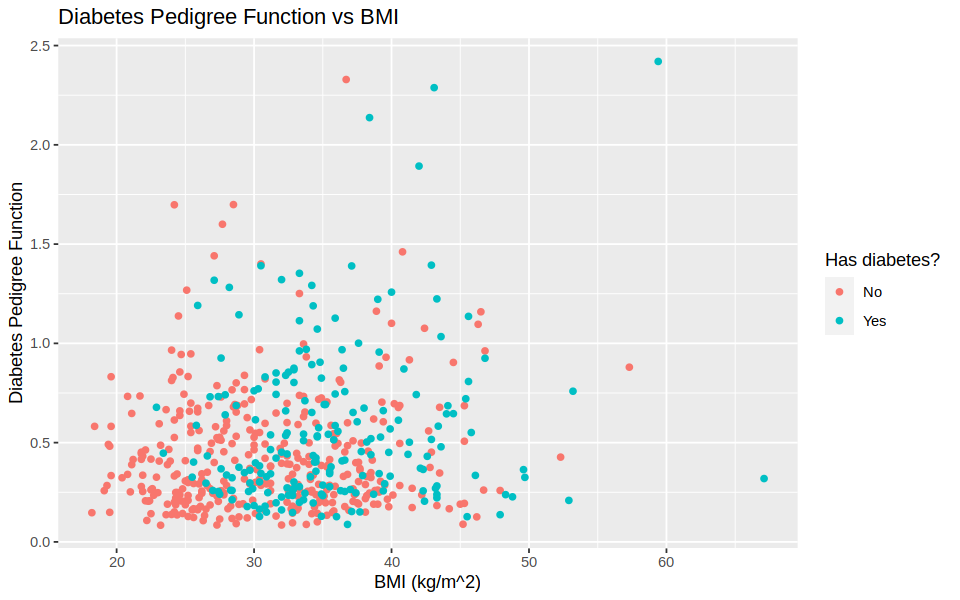

In [7]:
#make scatterplots to visualize the data
options(repr.plot.width = 8, repr.plot.height = 5)

diabetes_plot_1 <- diabetes_train |>
    ggplot(aes(x = DiabetesPedigreeFunction, y = Glucose, color = Outcome)) + 
        geom_point() + 
        xlab("Diabetes Pedigree Function") +
        ylab("Glucose") +
        labs(color = "Has diabetes?") +
        ggtitle("Glucose vs Diabetes Pedigree Function")
diabetes_plot_1

diabetes_plot_2 <- diabetes_train |>
    ggplot(aes(x = BMI, y = Glucose, color = Outcome)) + 
        geom_point() + 
        xlab("BMI (kg/m^2)") +
        ylab("Glucose") +
        labs(color = "Has diabetes?") +
        ggtitle("Glucose vs BMI")
diabetes_plot_2

diabetes_plot_3 <- diabetes_train |>
    ggplot(aes(x = BMI, y = DiabetesPedigreeFunction, color = Outcome)) + 
        geom_point() + 
        xlab("BMI (kg/m^2)") +
        ylab("Diabetes Pedigree Function") +
        labs(color = "Has diabetes?") +
        ggtitle("Diabetes Pedigree Function vs BMI")
diabetes_plot_3

### Methods

The columns from the data we are planning to use
are Glucose, BMI and Diabetes Pedigree Function. We found these to be the most influential factors contributing to the outcome. One reason these are the most influential is that other columns had many missing values making them more difficult to include in the dataset. another reason is that the data for diabetes pedigree function, BMI, and glucose levels have a lot of variability, and many recorded values.

These three variables will be used to analyze and predict if the patient has diabetes. We will use the K-nearest neighbors classification for this with these three factors as the predictors. As the data is not scaled, it is first important to scale and standardize the data so that all predictors have uniform priority. 

After the classification, we can visualize the results using plots of BMI vs Diabetes Pedigree Function, Diabetes Pedigree Function vs Glucose and BMI vs Glucose, and showing if the person has diabetes using color.

### Expected Outcomes and Significance

The factors diabetes pedigree fuction, BMI, and glucose level can be indicators for predicting diabetes. It is expected to find that having diabetes in family hitory, higher BMI, and elevated glucose levels are associated with having diabetes. By analyzing these factors, predictions can be made about a patient's risk of diabetes.

Such findings can have a significant impact on healthcare. By identifying the factors that contribute to the likelihood of having diabetes, healthcare professionals can better assess a patient's risk and provide targeted interventions and preventive measures. This can lead to earlier detection, improved management, and ultimately better health outcomes for individuals at risk of diabetes.

These findings can lead to several future questions and opportunities for research. For example, once the risk factors have been identified may ask “What are effective methods for targeting identified risk factors to prevent or delay the onset of diabetes?”. They could also investigate different lifestyle modifications to answer the question: “What is the impact of lifestyle modifications, such as diet and exercise, on reducing the risk of developing diabetes in people with diabetes in their family history or in various BMI categories?” By studying this we can discover new ways to help people living with diabetes or who are at risk of developing it, as well as targeting targeting the unnecessary stigma involved with this disease.

### References
“Diabetes Overview” *National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)*, April 2022, https://www.niddk.nih.gov/health-information/diabetes/overview 


Chauhan, Aman. “Predict Diabetes.” *Kaggle*, 2022, https://www.kaggle.com/datasets/whenamancodes/predict-diabities/data 